# Recursive ordering (Cholesky Decomposition) Identification of Monetary Policy Shocks

In [1]:
import pandas as pd

## Load Data + Necessary changes

In [2]:
MP_data = pd.read_excel("data/MP_data.xlsx")
MP_data.head(5)

# Engogenous variables
Y = MP_data[['LIP', 'LCPI', 'FFR']]

# Lagged endogenous variables
Y_1 = Y.shift(1)

# Because we take one lag of Y we lose the first observation
Y = Y.iloc[1:,:]
Y_1 = Y_1.iloc[1:,:]

Y.reset_index(drop=True, inplace=True)
Y_1.reset_index(drop=True, inplace=True)

Y.head(5)
# Y_1.head(5)

# Convert to Numpy to be able to use our own OLS estimator
Y = Y.to_numpy()
Y_1 = Y_1.to_numpy()

### OLS Function

In [3]:
import numpy as np
import scipy.stats as stats

def OLS(X,y,p):
    
    T = X.shape[0]
    K = X.shape[1]
    
    # Obtain the coefficients using the OLS formula (X^T*X)^(-1)*X^T*y
    A1 = np.matmul(X.T,X)
    A = np.linalg.inv(A1)
    B = np.matmul(X.T,y)
    coefficients = np.matmul(A,B)
    
    # Compute fitted values and residuals
    y_hat = np.matmul(X,coefficients)
    residuals = y - y_hat
    
    # Compute the variance of the residuals
    residuals_squared = np.matmul(residuals.T,residuals)
    Sigma = residuals_squared / (T - K*p)
    
    return coefficients, residuals, Sigma

## Estimate VAR model using OLS

In [4]:
p = 1 # Number of lags

beta, residuals, Sigma = OLS(Y_1,Y,p)
S = np.linalg.cholesky(Sigma)

print(S)

[[7.02881509e-03 0.00000000e+00 0.00000000e+00]
 [5.55487375e-05 2.48275877e-03 0.00000000e+00]
 [1.86476442e-01 5.80124069e-02 5.83910384e-01]]


We can back out the structural shocks using $u_t = S \varepsilon_t \Rightarrow \varepsilon_t = S^{-1} u_t$ 

In [5]:
structural_shocks = np.matmul(np.linalg.inv(S),residuals.T)

# MP shock is the last column (in this case the 3rd one)
MP_shock = structural_shocks[2,:]

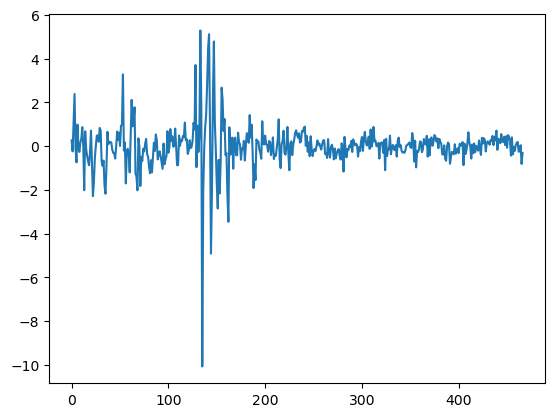

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(len(MP_shock)),MP_shock)